In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# acess key: 4/ygGJq1UW4qD_tdrg0nQP2pQhrZztW80rvc1MuI7iUfRqxC-sRnBtRKE

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualize satellite images
from skimage.io import imshow # visualize satellite images

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout # components of network
from keras.models import Sequential # type of model

In [60]:
x_train_set_fpath = '/content/drive/My Drive/X_test_sat4.csv'
y_train_set_fpath = '/content/drive/My Drive/y_test_sat4.csv'
print ('Loading Training Data')
X_train = pd.read_csv(x_train_set_fpath)
print ('Loaded 28 x 28 x 4 images')

Y_train = pd.read_csv(y_train_set_fpath)
print ('Loaded labels')

Loading Training Data
Loaded 28 x 28 x 4 images
Loaded labels


In [61]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
print ('We have',X_train.shape[0],'examples and each example is a list of',X_train.shape[1],'numbers with',Y_train.shape[1],'possible classifications.')

We have 99999 examples and each example is a list of 3136 numbers with 4 possible classifications.


In [62]:
#First we have to reshape each of them from a list of numbers to a 28*28*4 image.
X_train_img = X_train.reshape([99999,28,28,4]).astype(float)
print (X_train_img)

[[[[164. 139. 111. 196.]
   [171. 147. 122. 201.]
   [168. 139. 114. 197.]
   ...
   [171. 139. 109. 198.]
   [171. 140. 112. 197.]
   [172. 142. 116. 197.]]

  [[165. 144. 115. 197.]
   [169. 142. 115. 197.]
   [165. 138. 110. 196.]
   ...
   [174. 145. 118. 199.]
   [184. 160. 136. 208.]
   [176. 147. 122. 199.]]

  [[163. 136. 109. 193.]
   [164. 139. 109. 195.]
   [175. 152. 124. 202.]
   ...
   [169. 136. 109. 193.]
   [170. 142. 115. 195.]
   [186. 159. 140. 207.]]

  ...

  [[173. 147. 122. 200.]
   [174. 149. 126. 201.]
   [170. 144. 120. 198.]
   ...
   [159. 129.  94. 191.]
   [159. 128.  95. 191.]
   [170. 141. 115. 199.]]

  [[170. 145. 115. 200.]
   [164. 136. 108. 195.]
   [174. 151. 127. 202.]
   ...
   [170. 141. 112. 198.]
   [170. 144. 116. 200.]
   [162. 134. 105. 192.]]

  [[170. 140. 117. 201.]
   [171. 145. 122. 202.]
   [170. 144. 118. 200.]
   ...
   [169. 141. 108. 196.]
   [164. 140. 111. 195.]
   [174. 152. 127. 202.]]]


 [[[120. 114. 114. 132.]
   [111. 105

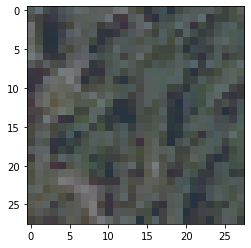

Trees


In [63]:
#Let's take a look at one image. Keep in mind the channels are R,G,B, and I(Infrared)
ix = 10 #Type a number between 0 and 99,999 inclusive
if(X_train_img[ix,0,0,0]>1):
  plt.imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype(float)/255) #Only seeing the RGB channels
else:
  plt.imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype(float))
plt.show()
#Tells what the image is
if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [0]:
model = Sequential([
    Dense(4, input_shape=(3136,), activation='softmax')
])

In [0]:
X_train = X_train/255

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=10, verbose=1, validation_split=0.01)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12548     
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________
Train on 98999 samples, validate on 1000 samples
Epoch 1/10
98999/98999 [==============================] - 13s 128us/step - loss: 0.7644 - accuracy: 0.6800 - val_loss: 0.6671 - val_accuracy: 0.7250
Epoch 2/10
98999/98999 [==============================] - 13s 127us/step - loss: 0.6717 - accuracy: 0.7189 - val_loss: 0.6321 - val_accuracy: 0.7660
Epoch 3/10
98999/98999 [==============================] - 12s 126us/step - loss: 0.6545 - accuracy: 0.7256 - val_loss: 0.6274 - val_accuracy: 0.7160
Epoch 4/10
98999/98999 [==============================] - 12s 126us/step - loss: 0.6522 - accuracy: 0.7243 - val_loss: 0.6114 - val_accuracy: 0.7670

In [67]:
preds = model.predict(X_train[-1000:], verbose=1)

1000/1000 [==============================] - 0s 66us/step


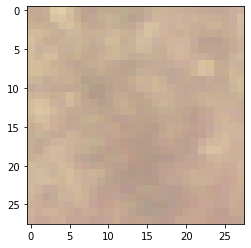

Prediction:
100.0% probability barren land,
0.0% probability trees,
0.0% probability grassland,
0.0% probability other

Ground Truth: Barren Land


In [70]:
ix = 8 #Type a number between 0 and 999 inclusive
if(X_train_img[99999-(1000-ix),0,0,0]>1):
  plt.imshow(np.squeeze(X_train_img[99999-(1000-ix),:,:,0:3]).astype(float)/255) #Only seeing the RGB channels
else:
  plt.imshow(np.squeeze(X_train_img[99999-(1000-ix),:,:,0:3]).astype(float))
plt.show()
#Tells what the image is
print ('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds[ix,0]*100,preds[ix,1]*100,preds[ix,2]*100,preds[ix,3]*100))

print ('Ground Truth: ',end='')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [0]:
'''#for any new image
from skimage.io import imread
import matplotlib.image as mpimg
im=mpimg.imread("path of the image")
plt.imshow(im) #Only seeing the RGB channels
plt.show()
preds0=model.predict(im,verbose=1)
#Tells what the image is
print ('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds0[0]*100,preds0[1]*100,preds0[2]*100,preds[3]*100))

print ('Ground Truth: ',end='')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')'''